In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
Audible_final = pd.read_csv('Audible_final.csv')
np.sum(Audible_final.isnull())
print np.sum(np.sum(Audible_final.isnull()))

1606


In [4]:
Audible_final = Audible_final.dropna(axis=0, how='any')
np.sum(Audible_final.isnull())
print np.sum(np.sum(Audible_final.isnull()))

0


In [5]:
Audible_final['RelDate'] = pd.to_datetime(Audible_final['RelDate'])

In [6]:
# Remove the $ from the prices
Audible_final['Price'].replace('\$','', regex=True, inplace=True)
# If there is a sale price lised take the regular price
def take_reg_price(string):
    #If two prices are lised take the first(regular) price
    # Look for hours and minutes and set variables
    if re.search('(\d+\.\d+),\d+\.\d',string):
        reg_price = re.search('(\d+\.\d+),\d+\.\d',string).group(1)
        return reg_price
    else:
        return string
Audible_final['Price'] = Audible_final['Price'].map(lambda x: take_reg_price(x))
# Now make the Price column a float
Audible_final['Price'] = Audible_final['Price'].map(lambda x: float(x))

In [7]:
# Remove the pre-releases
Scrape_Date = pd.to_datetime('2017-02-08')
PreReleases = Audible_final[Audible_final['RelDate'] >= Scrape_Date]
Audible_final = Audible_final[Audible_final['RelDate'] < Scrape_Date]
# Remove the released audiobooks with the length Not Yet Known 
Audible_final = Audible_final[Audible_final['Length'] != 'Not Yet Known']

In [8]:
# Convert the length column from a string of hours and minutes to an int in minutes
def hours_to_min(string):
    # Convert a column of hours and min to an int in min
    # Look for hours and minutes and set variables
    if re.search('(\d+) hrs',string):
        hour = re.search('(\d+) hrs',string).group(1)
    if re.search('(\d+) min', string):
        minute = re.search('(\d+) min', string).group(1)
    # Convert hour to minutes and add to minutes if found
    if re.search('(\d+) hrs',string) and re.search('(\d+) min', string):
        mins = (float(hour)*60) + float(minute)
    elif re.search('(\d+) hrs',string) :
        mins = float(hour)*60
    elif re.search('(\d+) min', string):
        mins = float(minute)
    else:
        mins = 60.0
    return mins

Audible_final['Length'] = Audible_final['Length'].map(lambda x: hours_to_min(x))
Audible_final['Length'].count()

200683

In [36]:
Audible_final[Audible_final['Length'] == np.max(Audible_final['Length'])]
len(Audible_final[Audible_final['Length'] == np.min(Audible_final['Length'])])
Audible_final[Audible_final['Price'] == np.max(Audible_final['Price'])]
Audible_final[Audible_final['NumOverRating'] == np.max(Audible_final['NumOverRating'])]
len(Audible_final[Audible_final['NumOverRating'] >= 35000])
Audible_final[Audible_final['NumOverRating'] >= 35000].groupby('Catagory').count()
#len(Audible_final[(Audible_final['OverallRating'] == 1) & 
#                  (Audible_final['StoryRating']   == 1) & 
#                  (Audible_final['PerformRating'] == 1) &
#                  (Audible_final['NumOverRating'] >= 6)])
Audible_final[(Audible_final['OverallRating'] == 1) & 
                  (Audible_final['StoryRating']   == 1) & 
                  (Audible_final['PerformRating'] == 1) &
#                  (Audible_final['NumOverRating'] >= 3)]
                  (Audible_final['NumOverRating'] >= 3)].groupby('Catagory').count()
Audible_final.groupby('Catagory').count()['Title']
Audible_final[(Audible_final['Catagory'] == 'Professionals')]
Audible_final.dtypes

OverallRating              float64
Publisher                   object
WrittenBy                   object
Price                      float64
RelDate             datetime64[ns]
NumStoryRating               int64
Length                     float64
Title                       object
Catagory                    object
PerformRating              float64
CompOrAb                    object
NumPerformRating             int64
StoryRating                float64
NumOverRating                int64
NarratedBy                  object
dtype: object

In [10]:
Before_Zero_Removal = Audible_final.describe()

In [11]:
print 'Number of zero ratings {}'.format(len(Audible_final[Audible_final['NumOverRating']==0]))

Number of zero ratings 42733


In [12]:
#Divide the Data into Reviewed and Unreviewed
Zero_Reviews = Audible_final[Audible_final['OverallRating'] == 0]
Reviewed_books = Audible_final[Audible_final['OverallRating'] != 0]

In [13]:
Zero_Reviews.describe()

,OverallRating,Price,NumStoryRating,Length,PerformRating,NumPerformRating,StoryRating,NumOverRating
count,42733.0,42733.000000,42733.0,42733.000000,42733.0,42733.0,42733.0,42733.0
mean,0.0,10.914162,0.0,185.621206,0.0,0.0,0.0,0.0
std,0.0,8.234818,0.0,243.293653,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0
25%,0.0,3.950000,0.0,19.000000,0.0,0.0,0.0,0.0
50%,0.0,6.950000,0.0,46.000000,0.0,0.0,0.0,0.0
75%,0.0,17.470000,0.0,309.000000,0.0,0.0,0.0,0.0
max,0.0,127.770000,0.0,5188.000000,0.0,0.0,0.0,0.0


In [14]:
Reviewed_books.describe()

,OverallRating,Price,NumStoryRating,Length,PerformRating,NumPerformRating,StoryRating,NumOverRating
count,157950.000000,157950.000000,157950.000000,157950.000000,157950.000000,157950.000000,157950.000000,157950.000000
mean,4.004108,18.166512,115.448547,426.838626,4.019033,115.413884,3.939785,142.993764
std,0.749126,9.154725,821.471543,335.966390,1.000986,821.508384,1.001213,960.079468
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.700000,11.020000,2.000000,175.000000,3.800000,2.000000,3.700000,3.000000
50%,4.100000,19.950000,9.000000,409.000000,4.300000,9.000000,4.200000,11.000000
75%,4.500000,24.490000,39.000000,605.000000,4.600000,39.000000,4.500000,51.000000
max,5.000000,242.900000,121447.000000,9239.000000,5.000000,121577.000000,5.000000,131838.000000


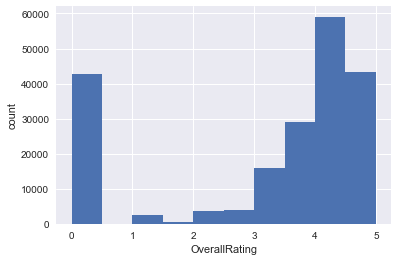

In [15]:
Audible_final['OverallRating'].plot.hist()
plt.xlabel('OverallRating')
plt.ylabel('count')

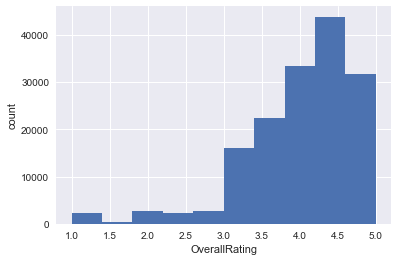

In [16]:
Reviewed_books['OverallRating'].plot.hist()
plt.xlabel('OverallRating')
plt.ylabel('count')

,NumStoryRating
0,1


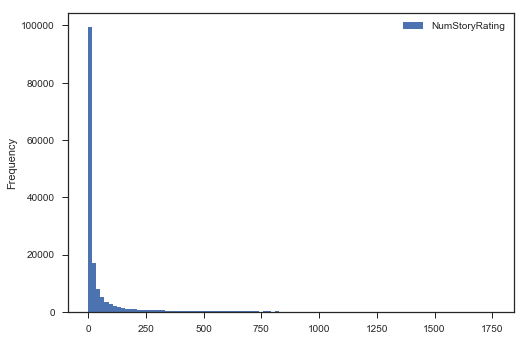

In [35]:
df = Reviewed_books[['NumStoryRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df.plot.hist(bins=100)
#plt.xlabel('NumStoryRating')
#plt.ylabel('count')
df.mode()

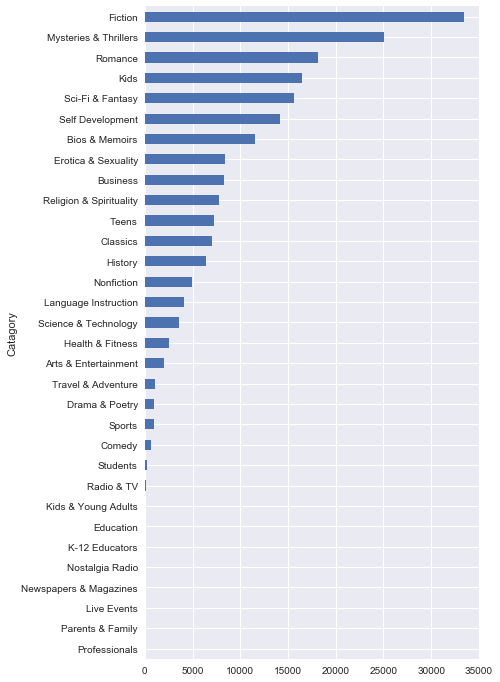

In [18]:
plt.figure(figsize=(6,12))
Audible_final.groupby('Catagory')['Title'].agg('count').sort_values(ascending=True).plot.barh()

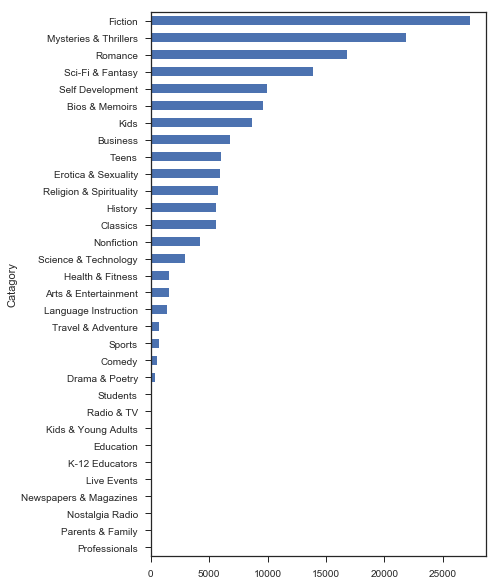

In [37]:
plt.figure(figsize=(6,10))
Reviewed_books.groupby('Catagory')['Title'].agg('count').sort_values(ascending=True).plot.barh()

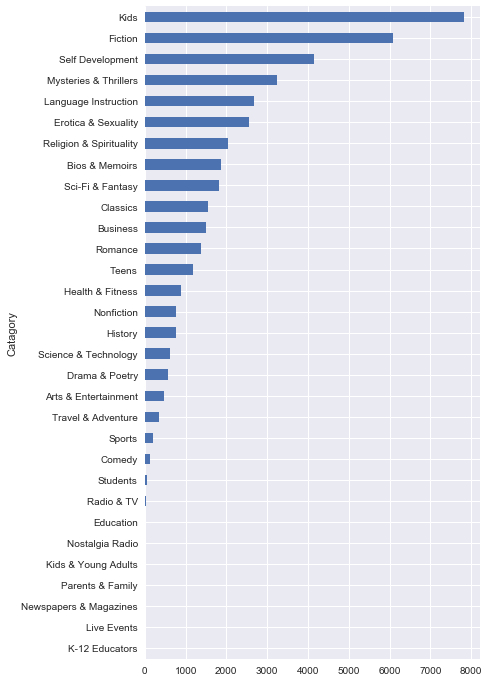

In [20]:
plt.figure(figsize=(6,12))
Zero_Reviews.groupby('Catagory')['Title'].agg('count').sort_values(ascending=True).plot.barh()


In [21]:
df = Reviewed_books[['OverallRating', 'NumOverRating']]
df = df[score_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df.plot.scatter('NumOverRating', 'OverallRating')

NameError: name 'score_df' is not defined

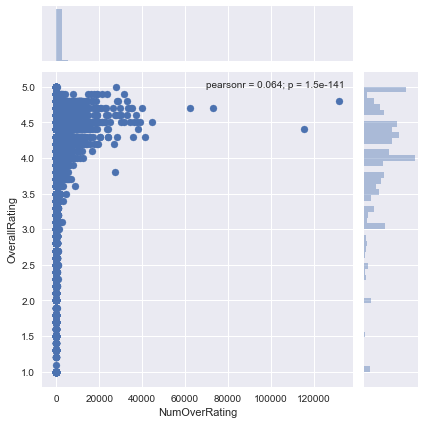

In [22]:
sns.jointplot(df['NumOverRating'], df['OverallRating'])

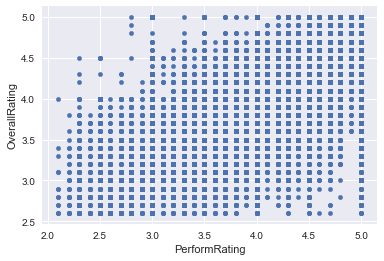

In [23]:
df = Reviewed_books[['OverallRating', 'PerformRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df.plot.scatter('PerformRating', 'OverallRating')

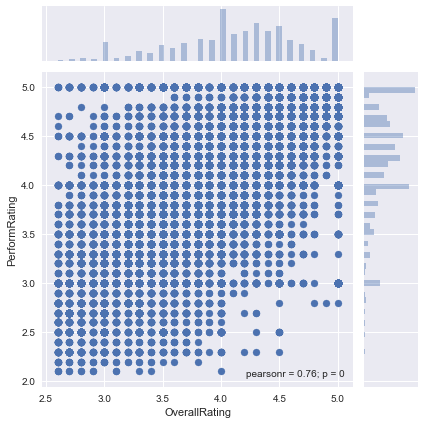

In [24]:
sns.jointplot(df['OverallRating'],df['PerformRating'])

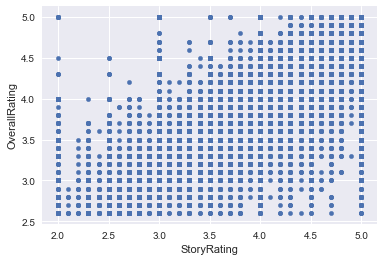

In [25]:
df = Reviewed_books[['OverallRating', 'StoryRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
df.plot.scatter('StoryRating', 'OverallRating')

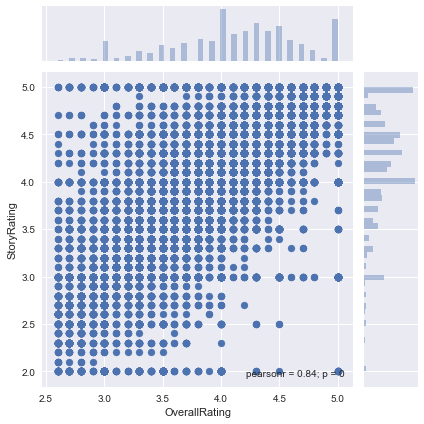

In [26]:
sns.jointplot(df['OverallRating'],df['StoryRating'])

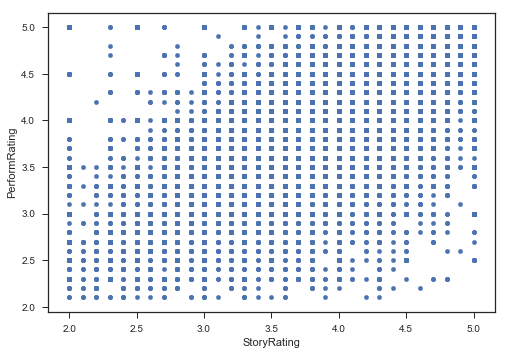

In [27]:
df = Reviewed_books[['PerformRating', 'StoryRating']]
#df.corr()
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
sns.set(style="ticks")
df.plot.scatter('StoryRating', 'PerformRating')

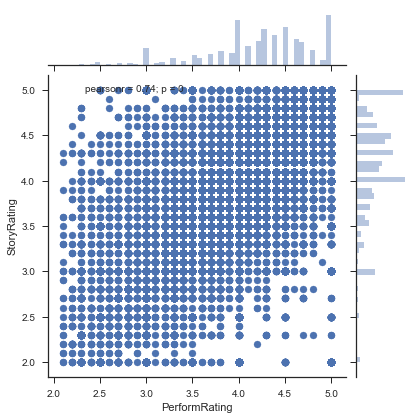

In [28]:
sns.set(style="ticks")
sns.jointplot(df['PerformRating'],df['StoryRating'])

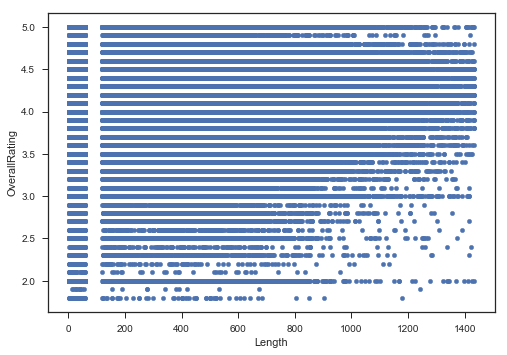

In [32]:
df = Reviewed_books[['Length', 'OverallRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sns.set(style="ticks")
df.plot.scatter('Length', 'OverallRating')

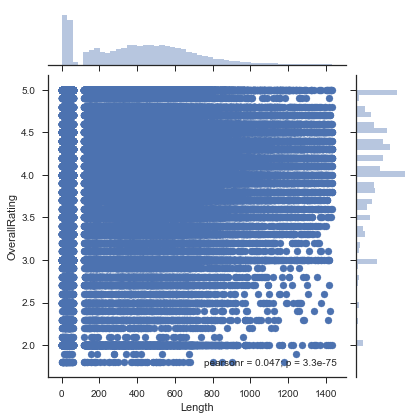

In [33]:
sns.set(style="ticks")
sns.jointplot(df['Length'],df['OverallRating'])

In [ ]:
df = Reviewed_books[['Length', 'OverallRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
sns.set(style="ticks")
df.plot.scatter('Length', 'OverallRating')

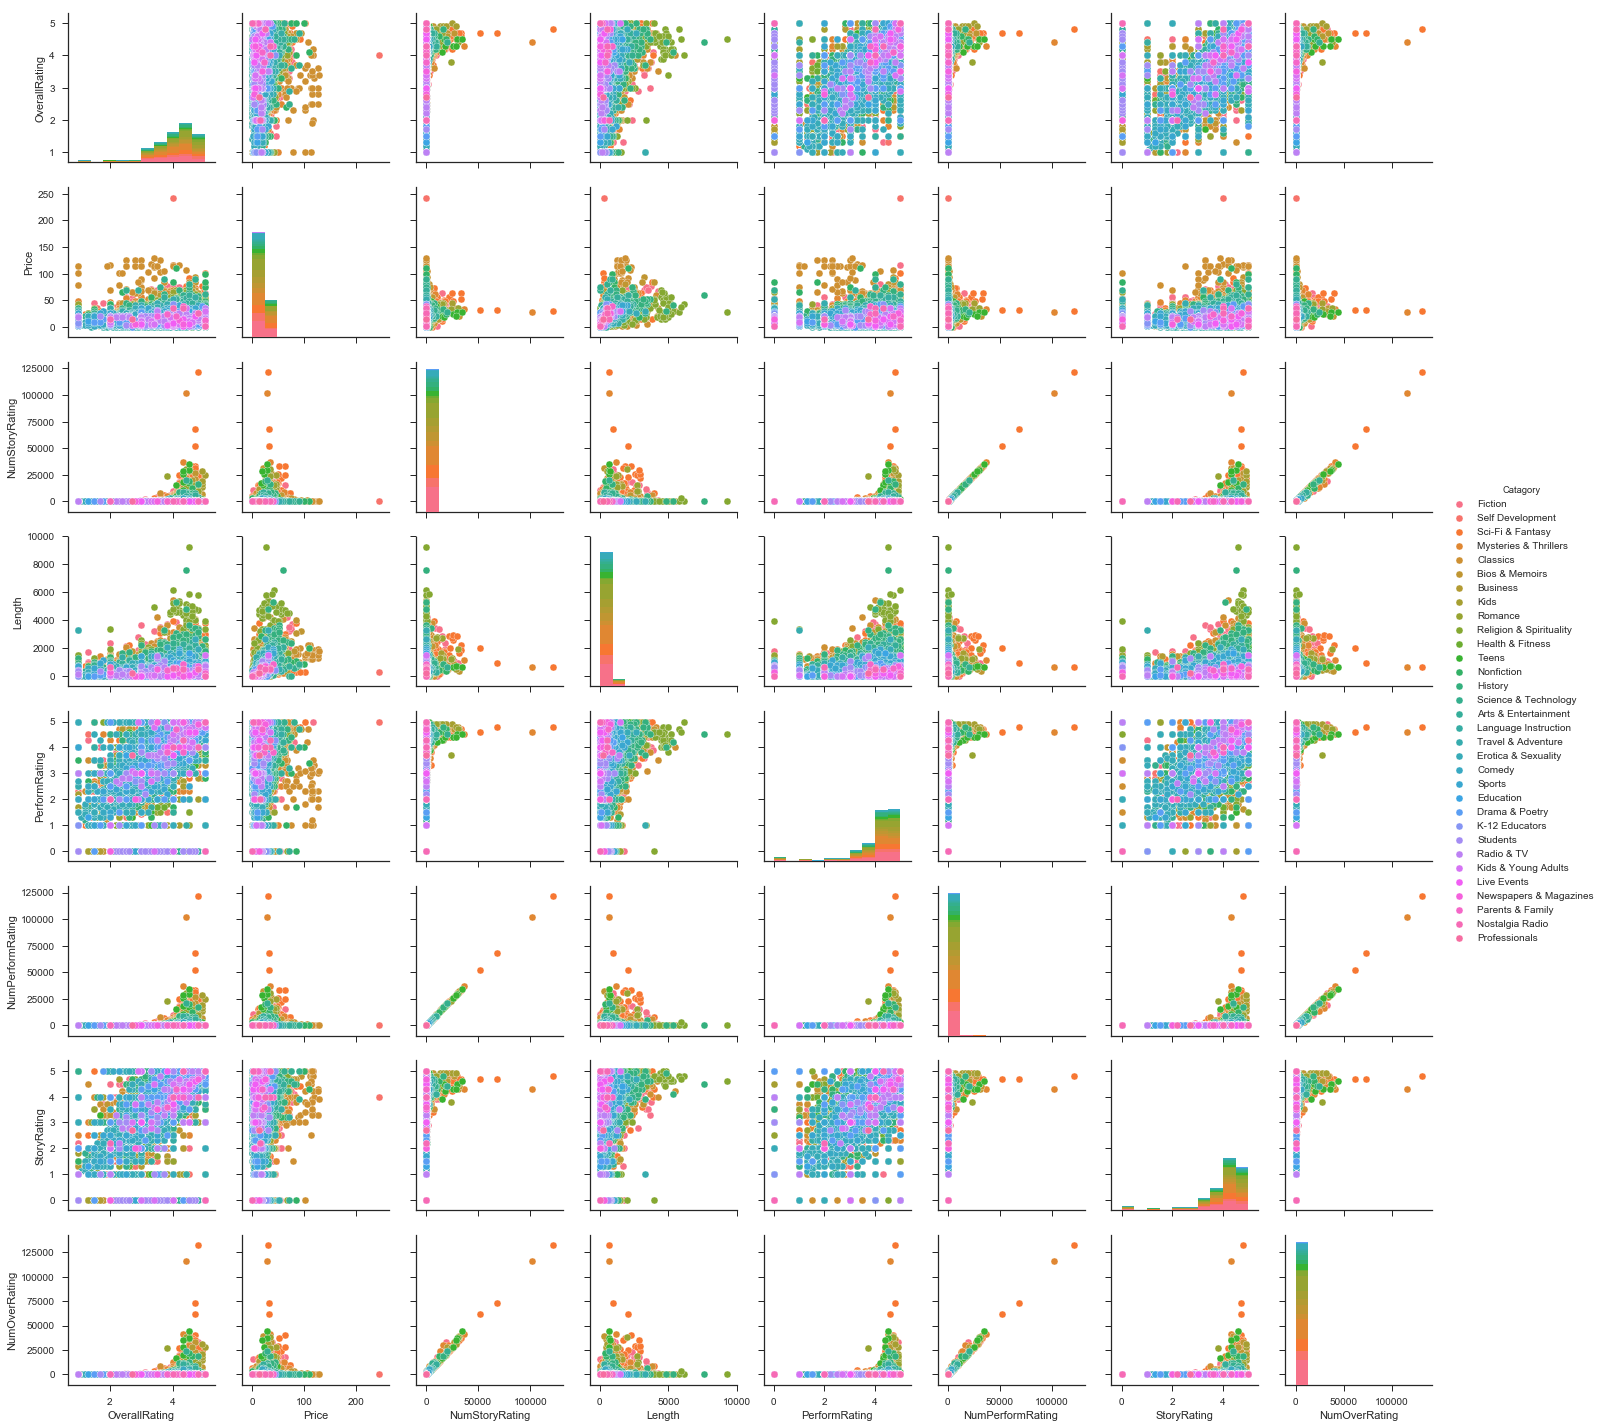

In [34]:
sns.pairplot(Reviewed_books, hue="Catagory")

In [ ]:
#def mul_narr(df,titles):
#    for title in titles:
#        if df['title']